In [ ]:
del model


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image as im
#from matplotlib.image import imread
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers, models, regularizers
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
def label_img(pic):
    if pic.startswith("non"): return [0, 1]
    else : return [1, 0]

In [3]:
data_folder = r"D:\AI_ML_DL\Omdena_Projects\SA\Mahrukh\CompleteData" + "/"
photos, labels = list(), list()

folder = listdir(data_folder)

for eachpic in folder: 
    label = label_img(eachpic)
    file = data_folder + eachpic
    image = load_img(file)
    image = img_to_array(image) / 255
    photos.append([image, label])
    

from random import shuffle

# shuffling of the training data to preserve the random state of our data
shuffle(photos)

# saving our trained data for further uses if required
np.save('photos.npy', photos)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [4]:
image.shape

(128, 128, 3)

In [5]:
train = photos[:2271]
test = photos[2271:]
print(len(train))
print(len(test))

2271
600


In [6]:
train_data = np.array([i[0] for i in train])
#x_train = np.array([i[0] for i in train]).reshape(-1, 64, 64, 1)
train_label = np.array([i[1] for i in train])
#x_test = np.array([i[0] for i in test]).reshape(-1, 64, 64, 1)
test_data = np.array([i[0] for i in test])
test_label = np.array([i[1] for i in test])
print(train_data.shape,  "\n",train_label.shape, "\n",test_data.shape, "\n",test_label.shape)

(2271, 128, 128, 3) 
 (2271, 2) 
 (600, 128, 128, 3) 
 (600, 2)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split 

train_x, val_x, train_y, val_y = train_test_split(train_data, train_label, test_size = 0.2)
batch_size = 16
num_classes = 2
epochs = 60

In [ ]:
del model

In [8]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01), input_shape=train_data.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(8, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01),))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(500, kernel_regularizer = regularizers.l2(0.01),activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                        

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode="auto",
     #                         patience=5, min_lr=0.001)

In [9]:
# Training the Model
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ["accuracy"])

In [10]:
#history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, verbose = 1, callbacks=[reduce_lr],
      #              validation_data = (val_x, val_y))
history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, verbose = 1, 
                    validation_data = (val_x, val_y))

Epoch 1/60
114/114 [==============================] - 104s 892ms/step - loss: 3.1197 - accuracy: 0.5286 - val_loss: 2.2676 - val_accuracy: 0.5604
Epoch 2/60
114/114 [==============================] - 110s 960ms/step - loss: 1.8152 - accuracy: 0.5611 - val_loss: 1.5681 - val_accuracy: 0.5604
Epoch 3/60
114/114 [==============================] - 103s 907ms/step - loss: 1.3264 - accuracy: 0.5694 - val_loss: 1.3678 - val_accuracy: 0.5604
Epoch 4/60
114/114 [==============================] - 106s 928ms/step - loss: 1.0714 - accuracy: 0.5738 - val_loss: 1.1428 - val_accuracy: 0.5604
Epoch 5/60
114/114 [==============================] - 97s 853ms/step - loss: 0.9356 - accuracy: 0.5754 - val_loss: 1.1130 - val_accuracy: 0.5604
Epoch 6/60
114/114 [==============================] - 89s 784ms/step - loss: 0.8525 - accuracy: 0.6013 - val_loss: 0.8416 - val_accuracy: 0.5604
Epoch 7/60
114/114 [==============================] - 88s 777ms/step - loss: 0.8137 - accuracy: 0.5798 - val_loss: 0.8675 - va

In [11]:
df_history = pd.DataFrame(history.history) 
df_history

,loss,accuracy,val_loss,val_accuracy
0,3.119671,0.528634,2.267579,0.560440
1,1.815151,0.561123,1.568147,0.560440
2,1.326405,0.569383,1.367776,0.560440
3,1.071445,0.573789,1.142846,0.560440
4,0.935555,0.575441,1.112992,0.560440
...,...,...,...,...
55,0.676795,0.612885,0.720757,0.582418
56,0.677347,0.626101,0.696086,0.564835
57,0.678440,0.612885,0.711079,0.560440
58,0.671471,0.620595,0.694921,0.571429


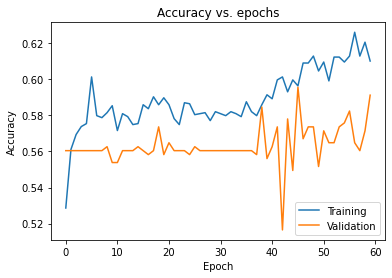

In [13]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [1]:
#Run this cell to plot the epoch vs loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

NameError: name 'plt' is not defined

In [15]:
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.709
Test accuracy: 57.00%


In [16]:
model.save("violent_non_violent.h5")